In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.decomposition import PCA

from EigenValues import getEigenValuesVector
from FileManager import getInputPath, getOutputPath
from PixelConverter import pixelToMatrix, matrixToPixel

In [2]:
# Constant.
NUM_COMPONENTS = 72

The input file is:  /home/lneumann/development/dgef-data-science/exercises/module4_part_2/data/lena-color.jpg


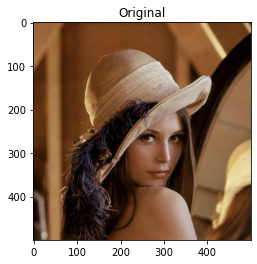

In [3]:
# Read original image.
originalImage = Image.open(getInputPath("lena-color.jpg"))

# Show image.
plt.imshow(originalImage)
plt.title("Original")
plt.show()

In [4]:
# Get original image array.
originalImageArray = np.asarray(originalImage)

# Original image shape.
print("Original image shape:", originalImageArray.shape)

Original image shape: (500, 500, 3)


Method 1.
Splitting the color image into its three channels (RGB).

Red image shape: (500, 500)
Green image shape: (500, 500)
Blue image shape: (500, 500)


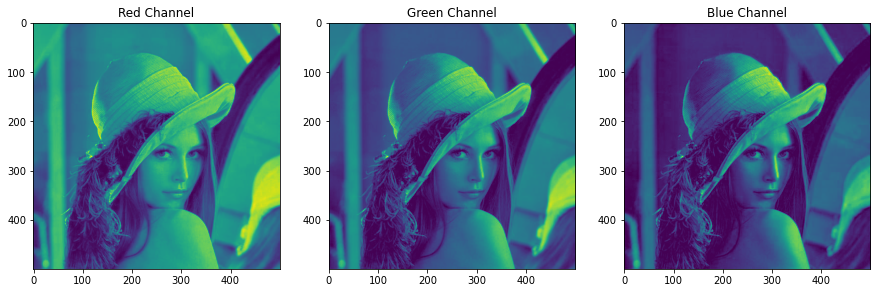

In [5]:
# Method 1.
# Splitting color image into its three channels.
redChannelImage, greenChannelImage, blueChannelImage = originalImage.split()

# Red channel image shape.
redChannelImageArray = np.asarray(redChannelImage)
print("Red image shape:", redChannelImageArray.shape)
redChannelImageTmpDF = pd.DataFrame(data=redChannelImageArray)
# print(redChannelImageTmpDF)
# Divide all the data at the channel by 255 so that the data is scaled between 0 and 1.
redChannelImage255 = redChannelImageArray / 255
# print(redChannelImage255)

# Green channel image shape.
greenChannelImageArray = np.asarray(greenChannelImage)
print("Green image shape:", greenChannelImageArray.shape)
greenChannelImageTmpDF = pd.DataFrame(data=greenChannelImageArray)
# print(greenChannelImageTmpDF)
# Divide all the data at the channel by 255 so that the data is scaled between 0 and 1.
greenChannelImage255 = greenChannelImageArray / 255
# print(greenChannelImage255)

# Blue channel image shape.
blueChannelImageArray = np.asarray(blueChannelImage)
print("Blue image shape:", blueChannelImageArray.shape)
blueChannelImageTmpDF = pd.DataFrame(data=blueChannelImageArray)
# print(blueChannelImageTmpDF)
# Divide all the data at the channel by 255 so that the data is scaled between 0 and 1.
blueChannelImage255 = blueChannelImageArray / 255
# print(blueChannelImage255)

# Plotting each channel image.
fig = plt.figure(figsize=(15, 7.2))
fig.add_subplot(131)
plt.title("Red Channel")
plt.imshow(redChannelImageArray)
fig.add_subplot(132)
plt.title("Green Channel")
plt.imshow(greenChannelImageArray)
fig.add_subplot(133)
plt.title("Blue Channel")
plt.imshow(blueChannelImageArray)

plt.show()

In [6]:
# Each channel has 500 dimensions, and we will now consider only NUM_COMPONENTS dimensions for PCA
# and fit and transform the data and check how much variance is explained after
# reducing data to NUM_COMPONENTS dimensions.
# PCA red channel.
redChannelPCAEngine = PCA(n_components=NUM_COMPONENTS)
redChannelPCAModel = redChannelPCAEngine.fit(redChannelImageArray)
transformedPCARedChannel = redChannelPCAEngine.transform(redChannelImageArray)
print("Transformed PCA red channel shape:", transformedPCARedChannel.shape)

# PCA green channel.
greenChannelPCAEngine = PCA(n_components=NUM_COMPONENTS)
greenChannelPCAModel = greenChannelPCAEngine.fit(greenChannelImageArray)
transformedPCAGreenChannel = greenChannelPCAEngine.transform(greenChannelImageArray)
print("Transformed PCA green channel shape:", transformedPCAGreenChannel.shape)

# PCA blue channel.
blueChannelPCAEngine = PCA(n_components=NUM_COMPONENTS)
blueChannelPCAModel = blueChannelPCAEngine.fit(blueChannelImageArray)
transformedPCABlueChannel = blueChannelPCAEngine.transform(blueChannelImageArray)
print("Transformed PCA blue channel shape:", transformedPCABlueChannel.shape)

Transformed PCA red channel shape: (500, 72)
Transformed PCA green channel shape: (500, 72)
Transformed PCA blue channel shape: (500, 72)


We can observe that only using NUM_COMPONENTS components, we can keep around 98% of the variance in the data of the image.


In [7]:
# Only using NUM_COMPONENTS components we can keep around > 98% of the variance in the data.
print(f"Red channel explained variance ratio sum: {sum(redChannelPCAModel.explained_variance_ratio_)}")
print(f"Green channel explained variance ratio sum: {sum(greenChannelPCAModel.explained_variance_ratio_)}")
print(f"Blue channel  explained variance ratio sum: {sum(blueChannelPCAModel.explained_variance_ratio_)}")

Red channel explained variance ratio sum: 0.9907230829146187
Green channel explained variance ratio sum: 0.988896542653083
Blue channel  explained variance ratio sum: 0.9863934889228992


The bar chart shows that the more NUM_COMPONENTS are selected to represent the image, the more quality we get on it.
And we can conclude that less principal components (eigen values) are used to compress teh image, the less quality
of it we get and more data is lost.

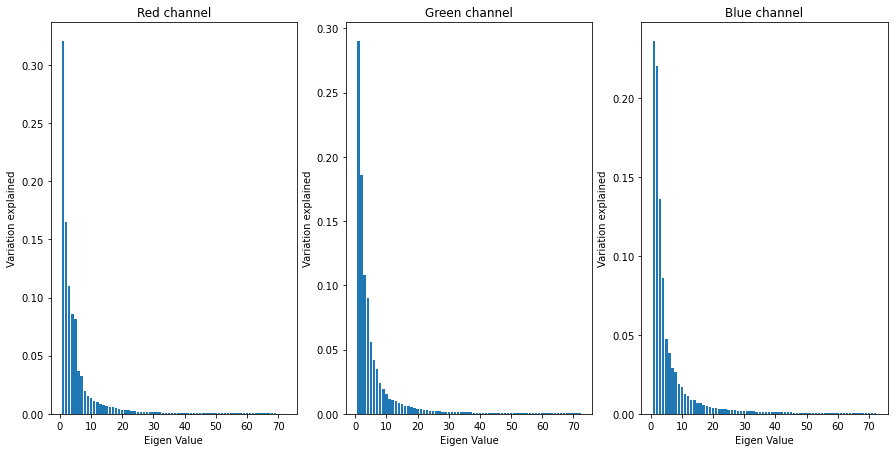

In [8]:
# Plot bar charts to check the explained variance ratio by each Eigenvalues separately
# for each of the 3 channels.
fig = plt.figure(figsize=(15, 7.2))
fig.add_subplot(131)
plt.title("Red channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1, NUM_COMPONENTS + 1)), redChannelPCAModel.explained_variance_ratio_)

fig.add_subplot(132)
plt.title("Green channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1, NUM_COMPONENTS + 1)), greenChannelPCAModel.explained_variance_ratio_)

fig.add_subplot(133)
plt.title("Blue channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1, NUM_COMPONENTS + 1)), blueChannelPCAModel.explained_variance_ratio_)

plt.show()

Method 1 results.
Reconstructing the image from de NUM_COMPONENTS (PCA or Eigen vectors) and comparing the reconstucted image with the
original one.

It is possible to observe that the reconstructed image from its main components presents differences and data
loss with respect to the original image, however it is possible to distinguish that the reconstructed image is
very similar to the original image.

Reconstructed red channel array shape:  (500, 500)
Reconstructed green channel array shape:  (500, 500)
Reconstructed blue channel array shape:  (500, 500)
Method 1 - compressed image shape:  (500, 500, 3)
The output file is:  /home/lneumann/development/dgef-data-science/exercises/module4_part_2/output/method-1-pca-compressed-lena.jpg


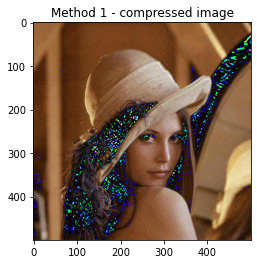

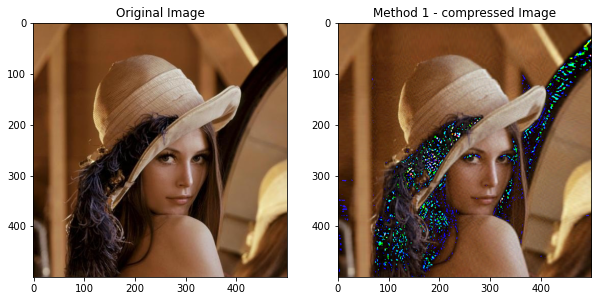

In [9]:
# Reconstruct the reduced image and visualize it.
# Reversing transform the data.
reconstructedRedChannelArray = np.asarray(redChannelPCAEngine.inverse_transform(transformedPCARedChannel))
print("Reconstructed red channel array shape: ", reconstructedRedChannelArray.shape)
# print(reconstructedRedChannelArray)

reconstructedGreenChannelArray = np.asarray(greenChannelPCAEngine.inverse_transform(transformedPCAGreenChannel))
print("Reconstructed green channel array shape: ", reconstructedGreenChannelArray.shape)
# print(reconstructedGreenChannelArray)

reconstructedBlueChannelArray = np.asarray(blueChannelPCAEngine.inverse_transform(transformedPCABlueChannel))
print("Reconstructed blue channel array shape: ", reconstructedBlueChannelArray.shape)
# print(reconstructedBlueChannelArray)

# Merging the data of all the 3 channels into one.
reducedImageArray = np.array(originalImage)
reducedImageArray[:, :, 0] = reconstructedRedChannelArray
reducedImageArray[:, :, 1] = reconstructedGreenChannelArray
reducedImageArray[:, :, 2] = reconstructedBlueChannelArray

reducedImage = Image.fromarray(reducedImageArray)
print("Method 1 - compressed image shape: ", reducedImageArray.shape)
reducedImage.save(getOutputPath("method-1-pca-compressed-lena.jpg"))
# reducedImage.show()

# Show reduced image.
plt.imshow(reducedImage)
plt.title("Method 1 - compressed image")
plt.show()

# Display both images in order to compare them.
fig = plt.figure(figsize=(10, 7.2))
fig.add_subplot(121)
plt.title("Original Image")
plt.imshow(originalImage)
fig.add_subplot(122)
plt.title("Method 1 - compressed Image")
plt.imshow(reducedImage)
plt.show()

Method 2.

Principal component analysis using the variance - covariance  matrix with and aproximation of 99% between the
reconstructed o decompressed image and the original one.

In [10]:
# Method 2.
originalImageMatrix = np.asarray(pixelToMatrix(originalImageArray))
print("Original image matrix shape:", originalImageMatrix.shape)

Original image matrix shape: (1500, 500)


Computing variance - covariance matrix.

In [11]:
# Variance - covariance matrix compute.
originalImageTransposeMatrix = np.matrix.transpose(originalImageMatrix)
print("Original image transpose matrix shape:", originalImageTransposeMatrix.shape)
varianceCovarianceMatrix = np.cov(originalImageTransposeMatrix)
print("Variance - covariance matrix shape:", varianceCovarianceMatrix.shape)

Original image transpose matrix shape: (500, 1500)
Variance - covariance matrix shape: (500, 500)


Computing the eigen values vector.

In [12]:
# eigenValuesVector = getEigenValuesVector(varianceCovarianceMatrix, 1.00)
eigenValuesVector = getEigenValuesVector(varianceCovarianceMatrix, 0.99)
eigenValuesMatrix = eigenValuesVector[3]
print("Eigenvalues matrix shape: ", eigenValuesMatrix.shape)

Eigenvalues matrix shape:  (500, 72)


In [13]:
# print("Eigenvalues matrix: ", eigenValuesMatrix)

Computing the reduced or compressed image.

In [14]:
eigenValuesTransposeMatrix = np.matrix.transpose(eigenValuesMatrix)
compressedImageMatrix = np.dot(eigenValuesTransposeMatrix, originalImageTransposeMatrix)
compressedImageTransposeMatrix = np.matrix.transpose(compressedImageMatrix)
eigenValuesVector = np.dot(compressedImageTransposeMatrix, eigenValuesTransposeMatrix)
compressedImage = matrixToPixel(eigenValuesVector)
compressedImage = Image.fromarray(compressedImage.astype('uint8'))
compressedImage.save(getOutputPath("method-2-pca-compressed-lena.jpg"))

The output file is:  /home/lneumann/development/dgef-data-science/exercises/module4_part_2/output/method-2-pca-compressed-lena.jpg


Showing the compressed image.

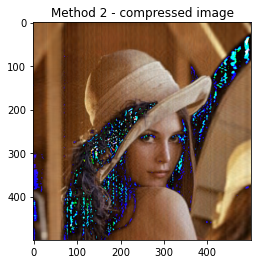

In [15]:
# Show compressed image.
plt.imshow(compressedImage)
plt.title("Method 2 - compressed image")
plt.show()

Method 2 results.
Displaying the compressed image to compare it with the original one.

As with method one, we can see that the reconstructed or decompressed image has a great resemblance to the one
resulting with the previous method. There are losses of information in the image and the image also bears a very
close resemblance to the original image.
The loss of data both for the image resulting from the first methodology and for the image resulting from the
second methodology, present data loss in the same regions of the image.

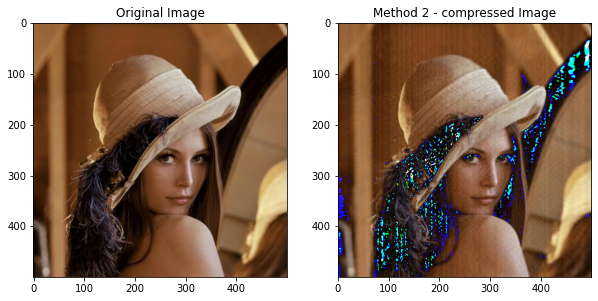

In [16]:
# Display both images in order to compare them.
fig = plt.figure(figsize=(10, 7.2))
fig.add_subplot(121)
plt.title("Original Image")
plt.imshow(originalImage)
fig.add_subplot(122)
plt.title("Method 2 - compressed Image")
plt.imshow(compressedImage)
plt.show()

To compare the similarity between the compressed images obtained from method 1 and method 2, please run:
**StructuralSimilarityIndex.py**

We can see that comparing the original image vs the image gotten from method 1, we get an
MSE ratio of 0.03 and a structural similarity index of 0.83 (higher is better).

The comparison between the original image vs the compressed image with method 2, the MSE
is 0.05 and the structural similarity index is of 0.80.

And finally, comparing the compressed image with method one against the image obtained with method two, an MSE of 0.03
and a structural similarity index of 0.85 are obtained.

We conclude that the images are very similar to the original and that the images obtained with the two compression
methods are not exactly the same, but they are very similar and the data loss occurs in the same region
of the image in both cases.